In [ ]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras

In [ ]:
face_cascade = cv2.CascadeClassifier('/haarcascade_frontalface_default.xml')

In [ ]:
acne_model = keras.models.load_model('/acneModel.h5')

In [ ]:
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

In [ ]:
def classify_acne(face_image):
    # Preprocess the face image (resize, normalize, etc.)
    face_image = preprocess_image(face_image)

    # Perform acne classification using the loaded model
    prediction = acne_model.predict(np.expand_dims(face_image, axis=0))

    # You may define acne classes and their meanings (e.g., 0: No Acne, 1: Mild Acne, 2: Moderate Acne, 3: Severe Acne)
    acne_class = np.argmax(prediction)
    acne_intensity = get_acne_intensity(acne_class)  # Define a function to map class to intensity

    return acne_class, acne_intensity

In [ ]:
def preprocess_image(image):
    # Perform resizing, normalization, and any other required preprocessing
    # You may also convert the image to grayscale if needed
    # Ensure that the input dimensions match the model's input shape

    return preprocessed_image

In [ ]:
def get_acne_intensity(acne_class):
    # Define a mapping from class to intensity (e.g., 0: None, 1: Mild, 2: Moderate, 3: Severe)
    intensity_mapping = {0: 'None', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
    return intensity_mapping.get(acne_class, 'Unknown')

In [ ]:
def analyze_skin(image_path):
    # Load the input image
    image = cv2.imread('/levle2_29_jpg.rf.8eab624a4825a2f007a56bce3ca1ecb0.jpg')

    # Detect faces in the image
    faces = detect_faces(image)

    # Process each detected face
    for (x, y, w, h) in faces:
        face_image = image[y:y+h, x:x+w]

        # Classify acne in the face
        acne_class, acne_intensity = classify_acne(face_image)

        # Draw a rectangle around the detected face and display acne intensity
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f'Acne: {acne_intensity}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

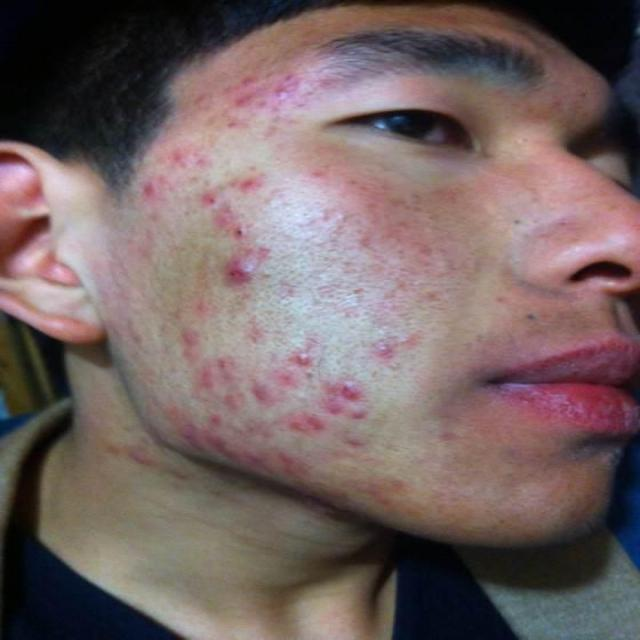

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load or create an image
image = cv2.imread('/levle2_29_jpg.rf.8eab624a4825a2f007a56bce3ca1ecb0.jpg')

# Check if the image is loaded successfully
if image is not None:
    # Display the image
    cv2_imshow(image)
else:
    print("Failed to load the image.")



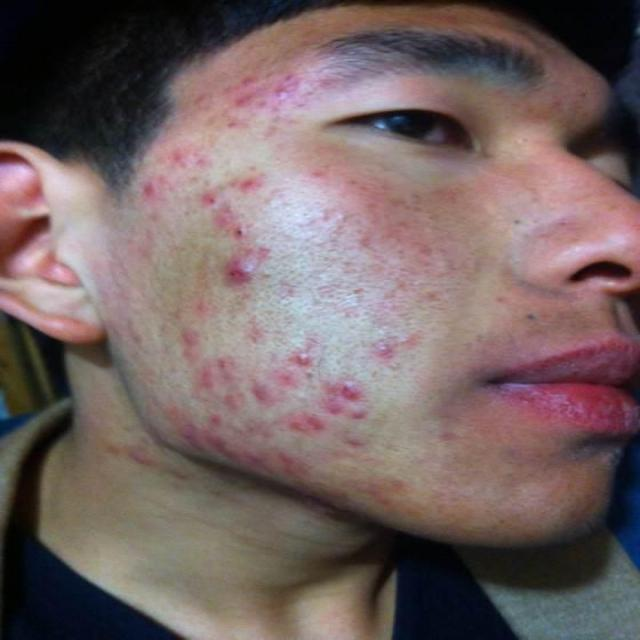

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/haarcascade_frontalface_default.xml')

def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces

def analyze_skin(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is not None:
        # Detect faces in the image
        faces = detect_faces(image)

        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Display the analyzed image
        cv2_imshow(image)
    else:
        print("Failed to load the image.")

# Usage example
image_path = '/levle2_29_jpg.rf.8eab624a4825a2f007a56bce3ca1ecb0.jpg'
analyze_skin(image_path)

